# Analysis of Taylor Swift Songs and Albums

<div><img src=attachment:Battan-FearlessTaylorsVersion.jpeg width="500"></div>
In this project, we are going to analyse the albums and songs of one the greatest music artists of the decade-Taylor Swift, using Python. First, we'll retreive information of her albums and then the songs of the albums using Spotify API and Python. Then we'll create the dataset of this information using Pandas. Now, We'll further analyse this dataset using Python analysis techniques and libraries ( Pandas, Matplotlib, Seaborn, etc. ).

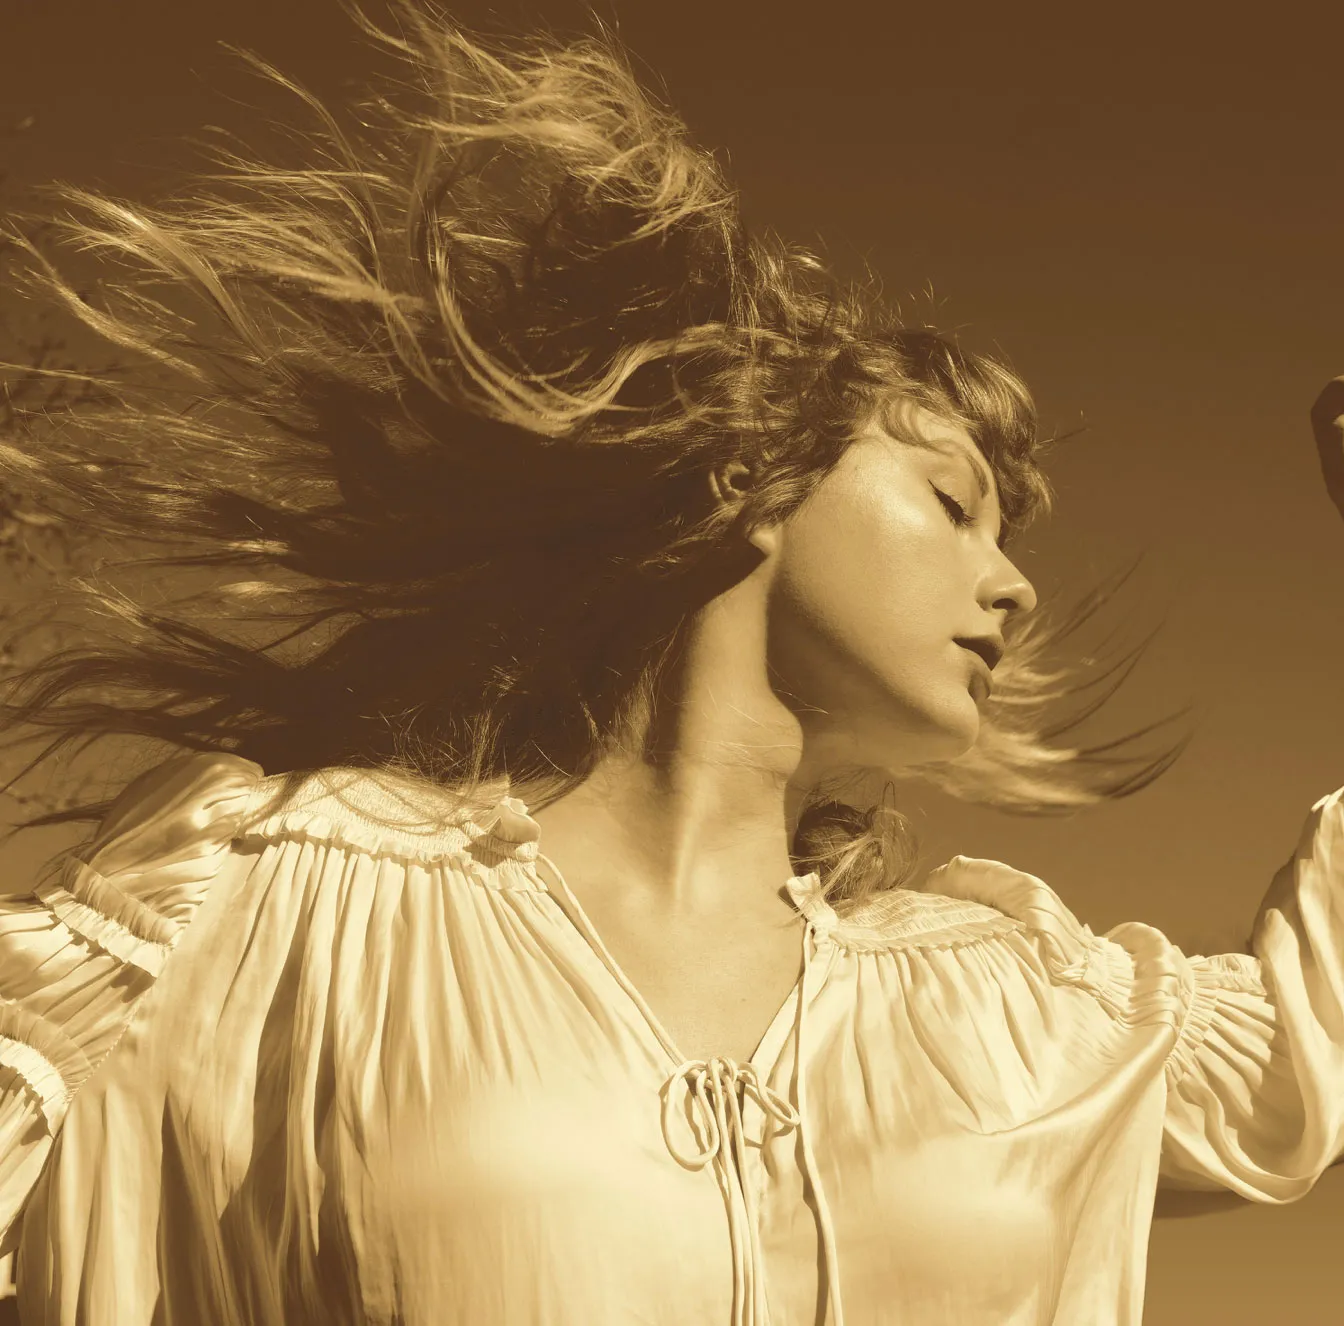

## Retrieving the dataset

We will be using the spotipy library to retrieve information by entering our client id and secret from Spotify for developers.
Our first step will be to install the spotipy library.

In [1]:
pip install spotipy --upgrade

Note: you may need to restart the kernel to use updated packages.


Now, import spotipy.To support the Client Credentials Flow Spotipy provides a class SpotifyClientCredentials that can be used to authenticate requests like so:

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#Authentication - without user
#client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='db2878810f2e4e3687636adc03f3246e', client_secret='945913267de5412eb4ce4f353d98112e'))


Grab the artist uri from spotify to get information about the artist

In [3]:
ty_uri='spotify:artist:06HL4z0CvFAxyc27GXpf02'
artist=spotify.artist(ty_uri)

In [4]:
#basic details of artist
print("Artist Name:"+artist['name'])
print("Artist Genre:"+artist['genres'][0])
print("Artist Popularity(out of 100):"+str(artist['popularity']))
print("Total number of Followers:"+str(artist['followers']['total']))



Artist Name:Taylor Swift
Artist Genre:pop
Artist Popularity(out of 100):93
Total number of Followers:55783959


## Data Preparation and Cleaning

To get the information about the albums the follwing code will be used.


In [5]:
artist_albums=spotify.artist_albums(ty_uri)
artist_albums.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

We only require the 'items' key from the above mentioned keys

In [6]:
artist_albums['items']

[{'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',


In [7]:
for p in artist_albums['items']:print(p)

{'album_group': 'album', 'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'}, 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02', 'id': '06HL4z0CvFAxyc27GXpf02', 'name': 'Taylor Swift', 'type': 'artist', 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 

In [8]:
import pandas as pd
df=pd.DataFrame(artist_albums['items'])
df

,album_group,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri
0,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/6k...,https://api.spotify.com/v1/albums/6kZ42qRrzov5...,6kZ42qRrzov54LcAk4onW9,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Red (Taylor's Version),2021-11-12,day,30,album,spotify:album:6kZ42qRrzov54LcAk4onW9
1,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/6x...,https://api.spotify.com/v1/albums/6x9s2ObPdpAT...,6x9s2ObPdpATZgrwxsk9c0,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Red (Taylor's Version),2021-11-12,day,30,album,spotify:album:6x9s2ObPdpATZgrwxsk9c0
2,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/4h...,https://api.spotify.com/v1/albums/4hDok0OAJd57...,4hDok0OAJd57SGIT8xuWJH,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Fearless (Taylor's Version),2021-04-09,day,26,album,spotify:album:4hDok0OAJd57SGIT8xuWJH
3,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/6A...,https://api.spotify.com/v1/albums/6AORtDjduMM3...,6AORtDjduMM3bupSWzbTSG,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",evermore (deluxe version),2021-01-07,day,17,album,spotify:album:6AORtDjduMM3bupSWzbTSG
4,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/1D...,https://api.spotify.com/v1/albums/1DT6fDJL6AWP...,1DT6fDJL6AWPJxe7Lq1dPb,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",evermore (deluxe version),2021-01-07,day,17,album,spotify:album:1DT6fDJL6AWPJxe7Lq1dPb
5,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/2X...,https://api.spotify.com/v1/albums/2Xoteh7uEpea...,2Xoteh7uEpea4TohMxjtaq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",evermore,2020-12-11,day,15,album,spotify:album:2Xoteh7uEpea4TohMxjtaq
6,album,album,[{'external_urls': {'spotify': 'https://open.s...,[JP],{'spotify': 'https://open.spotify.com/album/40...,https://api.spotify.com/v1/albums/40zKHK0aGM4P...,40zKHK0aGM4PITqPy5vfQh,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",evermore,2020-12-11,day,15,album,spotify:album:40zKHK0aGM4PITqPy5vfQh
7,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/5j...,https://api.spotify.com/v1/albums/5jmVg7rwRcgd...,5jmVg7rwRcgd6ARPAeYNSm,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",evermore,2020-12-10,day,15,album,spotify:album:5jmVg7rwRcgd6ARPAeYNSm
8,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/0P...,https://api.spotify.com/v1/albums/0PZ7lAru5FDF...,0PZ7lAru5FDFHuirTkWe9Z,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",folklore: the long pond studio sessions (from ...,2020-11-25,day,34,album,spotify:album:0PZ7lAru5FDFHuirTkWe9Z
9,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/3V...,https://api.spotify.com/v1/albums/3VaaZ7OIbGLi...,3VaaZ7OIbGLi60NVsnueoo,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",folklore: the long pond studio sessions (from ...,2020-11-25,day,34,album,spotify:album:3VaaZ7OIbGLi60NVsnueoo


Now in the artist_albums['items'] also, we'll need only the id, name, release_date and total_tracks

In [9]:
type(artist_albums['items'][0]['release_date'])

str

As we can see the data type of release date is str. We need to convert it to a datetime object for our analysis. We will do so by the following code -

In [10]:
#converting release date to datetime object
from datetime import datetime
for j in range(0,len(df)):
    artist_albums['items'][j]['release_date']=datetime.strptime(artist_albums['items'][j]['release_date'], '%Y-%m-%d')

In [11]:
albums={"Album ID":[],"Album Name":[],"Number of Tracks":[],"Date of Release":[]}
for i in range(0,len(df)):
    albums["Album ID"].append(artist_albums['items'][i]['id'])
    albums["Album Name"].append(artist_albums['items'][i]['name'])
    albums["Number of Tracks"].append(artist_albums['items'][i]['total_tracks'])
    albums["Date of Release"].append(artist_albums['items'][i]['release_date'])
    
df_albums=pd.DataFrame(albums)
df_albums


,Album ID,Album Name,Number of Tracks,Date of Release
0,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),30,2021-11-12
1,6x9s2ObPdpATZgrwxsk9c0,Red (Taylor's Version),30,2021-11-12
2,4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),26,2021-04-09
3,6AORtDjduMM3bupSWzbTSG,evermore (deluxe version),17,2021-01-07
4,1DT6fDJL6AWPJxe7Lq1dPb,evermore (deluxe version),17,2021-01-07
5,2Xoteh7uEpea4TohMxjtaq,evermore,15,2020-12-11
6,40zKHK0aGM4PITqPy5vfQh,evermore,15,2020-12-11
7,5jmVg7rwRcgd6ARPAeYNSm,evermore,15,2020-12-10
8,0PZ7lAru5FDFHuirTkWe9Z,folklore: the long pond studio sessions (from ...,34,2020-11-25
9,3VaaZ7OIbGLi60NVsnueoo,folklore: the long pond studio sessions (from ...,34,2020-11-25


Now we need to obtain the tracks from the albums which we will do as follows -


In [12]:
tracks=[]
for k in range (0,len(df)):
    tracks.append(spotify.album_tracks(df.id[k]))
tracks


[{'href': 'https://api.spotify.com/v1/albums/6kZ42qRrzov54LcAk4onW9/tracks?offset=0&limit=50',
  'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
      'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
      'id': '06HL4z0CvFAxyc27GXpf02',
      'name': 'Taylor Swift',
      'type': 'artist',
      'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES

In [13]:
d_f=pd.DataFrame(tracks)
d_f

,href,items,limit,next,offset,previous,total
0,https://api.spotify.com/v1/albums/6kZ42qRrzov5...,[{'artists': [{'external_urls': {'spotify': 'h...,50,None,0,None,30
1,https://api.spotify.com/v1/albums/6x9s2ObPdpAT...,[{'artists': [{'external_urls': {'spotify': 'h...,50,None,0,None,30
2,https://api.spotify.com/v1/albums/4hDok0OAJd57...,[{'artists': [{'external_urls': {'spotify': 'h...,50,None,0,None,26
3,https://api.spotify.com/v1/albums/6AORtDjduMM3...,[{'artists': [{'external_urls': {'spotify': 'h...,50,None,0,None,17
4,https://api.spotify.com/v1/albums/1DT6fDJL6AWP...,[{'artists': [{'external_urls': {'spotify': 'h...,50,None,0,None,17
5,https://api.spotify.com/v1/albums/2Xoteh7uEpea...,[{'artists': [{'external_urls': {'spotify': 'h...,50,None,0,None,15
6,https://api.spotify.com/v1/albums/40zKHK0aGM4P...,[{'artists': [{'external_urls': {'spotify': 'h...,50,None,0,None,15
7,https://api.spotify.com/v1/albums/5jmVg7rwRcgd...,[{'artists': [{'external_urls': {'spotify': 'h...,50,None,0,None,15
8,https://api.spotify.com/v1/albums/0PZ7lAru5FDF...,[{'artists': [{'external_urls': {'spotify': 'h...,50,None,0,None,34
9,https://api.spotify.com/v1/albums/3VaaZ7OIbGLi...,[{'artists': [{'external_urls': {'spotify': 'h...,50,None,0,None,34


As we can see, in each track there is a lot of unnecessary information which we are not going to need for our analysis. The only key that we need from the above list is items.

In [14]:
track=[]
for m in range(0,len(df_albums)):
    for n in range(0,len(d_f['items'][m])):
        track.append(spotify.track(d_f['items'][m][n]['id']))
df_track=pd.DataFrame(track) 
df_track


,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,295413,False,{'isrc': 'USUG12103661'},{'spotify': 'https://open.spotify.com/track/6l...,https://api.spotify.com/v1/tracks/6lzc0Al0zfZO...,6lzc0Al0zfZOIFsFvBS1ki,False,State Of Grace (Taylor's Version),69,None,1,track,spotify:track:6lzc0Al0zfZOIFsFvBS1ki
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,223093,False,{'isrc': 'USUG12103662'},{'spotify': 'https://open.spotify.com/track/4O...,https://api.spotify.com/v1/tracks/4OAuvHryIVv4...,4OAuvHryIVv4kMDNSLuPt6,False,Red (Taylor's Version),75,None,2,track,spotify:track:4OAuvHryIVv4kMDNSLuPt6
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,242720,False,{'isrc': 'USUG12103663'},{'spotify': 'https://open.spotify.com/track/3S...,https://api.spotify.com/v1/tracks/3S7HNKPakdwN...,3S7HNKPakdwNEBFIVTL6dZ,False,Treacherous (Taylor's Version),68,None,3,track,spotify:track:3S7HNKPakdwNEBFIVTL6dZ
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,219760,False,{'isrc': 'USUG12103664'},{'spotify': 'https://open.spotify.com/track/6A...,https://api.spotify.com/v1/tracks/6AtZLIzUINvE...,6AtZLIzUINvExIUy4QhdjP,False,I Knew You Were Trouble (Taylor's Version),73,None,4,track,spotify:track:6AtZLIzUINvExIUy4QhdjP
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,329160,False,{'isrc': 'USUG12103665'},{'spotify': 'https://open.spotify.com/track/3n...,https://api.spotify.com/v1/tracks/3nsfB1vus2qa...,3nsfB1vus2qaloUdcBZvDu,False,All Too Well (Taylor's Version),74,None,5,track,spotify:track:3nsfB1vus2qaloUdcBZvDu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,193811,False,{'isrc': 'USCJY1531540'},{'spotify': 'https://open.spotify.com/track/4D...,https://api.spotify.com/v1/tracks/4Dzma7nri1H2...,4Dzma7nri1H2XNQ7b8Fs5b,False,I Know Places - Karaoke Version,14,None,12,track,spotify:track:4Dzma7nri1H2XNQ7b8Fs5b
436,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,269207,False,{'isrc': 'USCJY1531541'},{'spotify': 'https://open.spotify.com/track/7A...,https://api.spotify.com/v1/tracks/7AiIXVMIrTqH...,7AiIXVMIrTqHlGn7bS3f31,False,Clean - Karaoke Version,13,None,13,track,spotify:track:7AiIXVMIrTqHlGn7bS3f31
437,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,242409,False,{'isrc': 'USCJY1531542'},{'spotify': 'https://open.spotify.com/track/6w...,https://api.spotify.com/v1/tracks/6wyqsJdxRsSM...,6wyqsJdxRsSM6k5hCF1pvt,False,Wonderland - Karaoke Version,11,None,14,track,spotify:track:6wyqsJdxRsSM6k5hCF1pvt
438,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,266003,False,{'isrc': 'USCJY1531543'},{'spotify': 'https://open.spotify.com/track/4x...,https://api.spotify.com/v1/tracks/4xUyg90BLSnP...,4xUyg90BLSnPFXbqDAlBKF,False,You Are In Love - Karaoke Version,12,None,15,track,spotify:track:4xUyg90BLSnPFXbqDAlBKF


To get more information on tracks, we'll use the following-

In [15]:
track_info=[]
track_features=[]
tr_fe=[]
for id0 in df_track['id']:
    track_info.append(spotify.track(id0))
    tr_fe.append(spotify.audio_features(id0))
df_trInfo=pd.DataFrame(track_info)
for j in range(0,len(df_track)):
    track_features.append(tr_fe[j][0])
df_trFeatures=pd.DataFrame.from_dict(track_features)


In [16]:
df_trInfo

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,295413,False,{'isrc': 'USUG12103661'},{'spotify': 'https://open.spotify.com/track/6l...,https://api.spotify.com/v1/tracks/6lzc0Al0zfZO...,6lzc0Al0zfZOIFsFvBS1ki,False,State Of Grace (Taylor's Version),69,None,1,track,spotify:track:6lzc0Al0zfZOIFsFvBS1ki
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,223093,False,{'isrc': 'USUG12103662'},{'spotify': 'https://open.spotify.com/track/4O...,https://api.spotify.com/v1/tracks/4OAuvHryIVv4...,4OAuvHryIVv4kMDNSLuPt6,False,Red (Taylor's Version),75,None,2,track,spotify:track:4OAuvHryIVv4kMDNSLuPt6
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,242720,False,{'isrc': 'USUG12103663'},{'spotify': 'https://open.spotify.com/track/3S...,https://api.spotify.com/v1/tracks/3S7HNKPakdwN...,3S7HNKPakdwNEBFIVTL6dZ,False,Treacherous (Taylor's Version),68,None,3,track,spotify:track:3S7HNKPakdwNEBFIVTL6dZ
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,219760,False,{'isrc': 'USUG12103664'},{'spotify': 'https://open.spotify.com/track/6A...,https://api.spotify.com/v1/tracks/6AtZLIzUINvE...,6AtZLIzUINvExIUy4QhdjP,False,I Knew You Were Trouble (Taylor's Version),73,None,4,track,spotify:track:6AtZLIzUINvExIUy4QhdjP
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,329160,False,{'isrc': 'USUG12103665'},{'spotify': 'https://open.spotify.com/track/3n...,https://api.spotify.com/v1/tracks/3nsfB1vus2qa...,3nsfB1vus2qaloUdcBZvDu,False,All Too Well (Taylor's Version),74,None,5,track,spotify:track:3nsfB1vus2qaloUdcBZvDu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,193811,False,{'isrc': 'USCJY1531540'},{'spotify': 'https://open.spotify.com/track/4D...,https://api.spotify.com/v1/tracks/4Dzma7nri1H2...,4Dzma7nri1H2XNQ7b8Fs5b,False,I Know Places - Karaoke Version,14,None,12,track,spotify:track:4Dzma7nri1H2XNQ7b8Fs5b
436,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,269207,False,{'isrc': 'USCJY1531541'},{'spotify': 'https://open.spotify.com/track/7A...,https://api.spotify.com/v1/tracks/7AiIXVMIrTqH...,7AiIXVMIrTqHlGn7bS3f31,False,Clean - Karaoke Version,13,None,13,track,spotify:track:7AiIXVMIrTqHlGn7bS3f31
437,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,242409,False,{'isrc': 'USCJY1531542'},{'spotify': 'https://open.spotify.com/track/6w...,https://api.spotify.com/v1/tracks/6wyqsJdxRsSM...,6wyqsJdxRsSM6k5hCF1pvt,False,Wonderland - Karaoke Version,11,None,14,track,spotify:track:6wyqsJdxRsSM6k5hCF1pvt
438,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,266003,False,{'isrc': 'USCJY1531543'},{'spotify': 'https://open.spotify.com/track/4x...,https://api.spotify.com/v1/tracks/4xUyg90BLSnP...,4xUyg90BLSnPFXbqDAlBKF,False,You Are In Love - Karaoke Version,12,None,15,track,spotify:track:4xUyg90BLSnPFXbqDAlBKF


In [17]:
df_trFeatures

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.594,0.713,9,-5.314,1,0.0503,0.000328,0.000000,0.1140,0.328,129.958,audio_features,6lzc0Al0zfZOIFsFvBS1ki,spotify:track:6lzc0Al0zfZOIFsFvBS1ki,https://api.spotify.com/v1/tracks/6lzc0Al0zfZO...,https://api.spotify.com/v1/audio-analysis/6lzc...,295413,4
1,0.516,0.777,1,-4.908,0,0.0375,0.001080,0.000002,0.0761,0.408,125.047,audio_features,4OAuvHryIVv4kMDNSLuPt6,spotify:track:4OAuvHryIVv4kMDNSLuPt6,https://api.spotify.com/v1/tracks/4OAuvHryIVv4...,https://api.spotify.com/v1/audio-analysis/4OAu...,223093,4
2,0.645,0.593,2,-6.506,1,0.0288,0.034400,0.000127,0.1300,0.299,109.984,audio_features,3S7HNKPakdwNEBFIVTL6dZ,spotify:track:3S7HNKPakdwNEBFIVTL6dZ,https://api.spotify.com/v1/tracks/3S7HNKPakdwN...,https://api.spotify.com/v1/audio-analysis/3S7H...,242720,4
3,0.584,0.557,6,-6.371,1,0.0342,0.012900,0.000000,0.0576,0.767,154.008,audio_features,6AtZLIzUINvExIUy4QhdjP,spotify:track:6AtZLIzUINvExIUy4QhdjP,https://api.spotify.com/v1/tracks/6AtZLIzUINvE...,https://api.spotify.com/v1/audio-analysis/6AtZ...,219760,4
4,0.440,0.528,0,-7.809,1,0.0317,0.017100,0.002030,0.2340,0.132,185.972,audio_features,3nsfB1vus2qaloUdcBZvDu,spotify:track:3nsfB1vus2qaloUdcBZvDu,https://api.spotify.com/v1/tracks/3nsfB1vus2qa...,https://api.spotify.com/v1/audio-analysis/3nsf...,329160,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.640,0.713,0,-6.634,1,0.0606,0.011200,0.012600,0.6400,0.413,80.014,audio_features,4Dzma7nri1H2XNQ7b8Fs5b,spotify:track:4Dzma7nri1H2XNQ7b8Fs5b,https://api.spotify.com/v1/tracks/4Dzma7nri1H2...,https://api.spotify.com/v1/audio-analysis/4Dzm...,193811,4
436,0.856,0.371,4,-9.921,1,0.0425,0.241000,0.819000,0.1110,0.384,103.999,audio_features,7AiIXVMIrTqHlGn7bS3f31,spotify:track:7AiIXVMIrTqHlGn7bS3f31,https://api.spotify.com/v1/tracks/7AiIXVMIrTqH...,https://api.spotify.com/v1/audio-analysis/7AiI...,269207,4
437,0.464,0.561,8,-6.741,1,0.0314,0.005570,0.600000,0.1080,0.090,184.048,audio_features,6wyqsJdxRsSM6k5hCF1pvt,spotify:track:6wyqsJdxRsSM6k5hCF1pvt,https://api.spotify.com/v1/tracks/6wyqsJdxRsSM...,https://api.spotify.com/v1/audio-analysis/6wyq...,242409,4
438,0.448,0.424,9,-12.148,1,0.0380,0.806000,0.781000,0.0946,0.209,84.923,audio_features,4xUyg90BLSnPFXbqDAlBKF,spotify:track:4xUyg90BLSnPFXbqDAlBKF,https://api.spotify.com/v1/tracks/4xUyg90BLSnP...,https://api.spotify.com/v1/audio-analysis/4xUy...,266003,4


There is a lot going on in the above two DataFrames. This amount of information is meaningless for us. So, we will filter out the data we'll require for our analysis.

In [18]:
dff=df_trInfo.merge(df_trFeatures, on='id')

In [19]:
dff.columns

Index(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms_x',
       'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local',
       'name', 'popularity', 'preview_url', 'track_number', 'type_x', 'uri_x',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_y', 'uri_y', 'track_href', 'analysis_url', 'duration_ms_y',
       'time_signature'],
      dtype='object')

In [20]:
dff

,album,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,295413,False,{'isrc': 'USUG12103661'},{'spotify': 'https://open.spotify.com/track/6l...,https://api.spotify.com/v1/tracks/6lzc0Al0zfZO...,6lzc0Al0zfZOIFsFvBS1ki,...,0.000000,0.1140,0.328,129.958,audio_features,spotify:track:6lzc0Al0zfZOIFsFvBS1ki,https://api.spotify.com/v1/tracks/6lzc0Al0zfZO...,https://api.spotify.com/v1/audio-analysis/6lzc...,295413,4
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,223093,False,{'isrc': 'USUG12103662'},{'spotify': 'https://open.spotify.com/track/4O...,https://api.spotify.com/v1/tracks/4OAuvHryIVv4...,4OAuvHryIVv4kMDNSLuPt6,...,0.000002,0.0761,0.408,125.047,audio_features,spotify:track:4OAuvHryIVv4kMDNSLuPt6,https://api.spotify.com/v1/tracks/4OAuvHryIVv4...,https://api.spotify.com/v1/audio-analysis/4OAu...,223093,4
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,242720,False,{'isrc': 'USUG12103663'},{'spotify': 'https://open.spotify.com/track/3S...,https://api.spotify.com/v1/tracks/3S7HNKPakdwN...,3S7HNKPakdwNEBFIVTL6dZ,...,0.000127,0.1300,0.299,109.984,audio_features,spotify:track:3S7HNKPakdwNEBFIVTL6dZ,https://api.spotify.com/v1/tracks/3S7HNKPakdwN...,https://api.spotify.com/v1/audio-analysis/3S7H...,242720,4
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,219760,False,{'isrc': 'USUG12103664'},{'spotify': 'https://open.spotify.com/track/6A...,https://api.spotify.com/v1/tracks/6AtZLIzUINvE...,6AtZLIzUINvExIUy4QhdjP,...,0.000000,0.0576,0.767,154.008,audio_features,spotify:track:6AtZLIzUINvExIUy4QhdjP,https://api.spotify.com/v1/tracks/6AtZLIzUINvE...,https://api.spotify.com/v1/audio-analysis/6AtZ...,219760,4
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,329160,False,{'isrc': 'USUG12103665'},{'spotify': 'https://open.spotify.com/track/3n...,https://api.spotify.com/v1/tracks/3nsfB1vus2qa...,3nsfB1vus2qaloUdcBZvDu,...,0.002030,0.2340,0.132,185.972,audio_features,spotify:track:3nsfB1vus2qaloUdcBZvDu,https://api.spotify.com/v1/tracks/3nsfB1vus2qa...,https://api.spotify.com/v1/audio-analysis/3nsf...,329160,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,193811,False,{'isrc': 'USCJY1531540'},{'spotify': 'https://open.spotify.com/track/4D...,https://api.spotify.com/v1/tracks/4Dzma7nri1H2...,4Dzma7nri1H2XNQ7b8Fs5b,...,0.012600,0.6400,0.413,80.014,audio_features,spotify:track:4Dzma7nri1H2XNQ7b8Fs5b,https://api.spotify.com/v1/tracks/4Dzma7nri1H2...,https://api.spotify.com/v1/audio-analysis/4Dzm...,193811,4
436,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,269207,False,{'isrc': 'USCJY1531541'},{'spotify': 'https://open.spotify.com/track/7A...,https://api.spotify.com/v1/tracks/7AiIXVMIrTqH...,7AiIXVMIrTqHlGn7bS3f31,...,0.819000,0.1110,0.384,103.999,audio_features,spotify:track:7AiIXVMIrTqHlGn7bS3f31,https://api.spotify.com/v1/tracks/7AiIXVMIrTqH...,https://api.spotify.com/v1/audio-analysis/7AiI...,269207,4
437,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://op

In [21]:
album_names=[d['name'] for d in dff['album']]
DFalbum_names=pd.DataFrame(album_names)
DFalbum_names

,0
0,Red (Taylor's Version)
1,Red (Taylor's Version)
2,Red (Taylor's Version)
3,Red (Taylor's Version)
4,Red (Taylor's Version)
...,...
435,Taylor Swift Karaoke: 1989 (Deluxe)
436,Taylor Swift Karaoke: 1989 (Deluxe)
437,Taylor Swift Karaoke: 1989 (Deluxe)
438,Taylor Swift Karaoke: 1989 (Deluxe)


In [22]:
dff['album']=DFalbum_names.values

In [23]:
dff

,album,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
0,Red (Taylor's Version),[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,295413,False,{'isrc': 'USUG12103661'},{'spotify': 'https://open.spotify.com/track/6l...,https://api.spotify.com/v1/tracks/6lzc0Al0zfZO...,6lzc0Al0zfZOIFsFvBS1ki,...,0.000000,0.1140,0.328,129.958,audio_features,spotify:track:6lzc0Al0zfZOIFsFvBS1ki,https://api.spotify.com/v1/tracks/6lzc0Al0zfZO...,https://api.spotify.com/v1/audio-analysis/6lzc...,295413,4
1,Red (Taylor's Version),[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,223093,False,{'isrc': 'USUG12103662'},{'spotify': 'https://open.spotify.com/track/4O...,https://api.spotify.com/v1/tracks/4OAuvHryIVv4...,4OAuvHryIVv4kMDNSLuPt6,...,0.000002,0.0761,0.408,125.047,audio_features,spotify:track:4OAuvHryIVv4kMDNSLuPt6,https://api.spotify.com/v1/tracks/4OAuvHryIVv4...,https://api.spotify.com/v1/audio-analysis/4OAu...,223093,4
2,Red (Taylor's Version),[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,242720,False,{'isrc': 'USUG12103663'},{'spotify': 'https://open.spotify.com/track/3S...,https://api.spotify.com/v1/tracks/3S7HNKPakdwN...,3S7HNKPakdwNEBFIVTL6dZ,...,0.000127,0.1300,0.299,109.984,audio_features,spotify:track:3S7HNKPakdwNEBFIVTL6dZ,https://api.spotify.com/v1/tracks/3S7HNKPakdwN...,https://api.spotify.com/v1/audio-analysis/3S7H...,242720,4
3,Red (Taylor's Version),[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,219760,False,{'isrc': 'USUG12103664'},{'spotify': 'https://open.spotify.com/track/6A...,https://api.spotify.com/v1/tracks/6AtZLIzUINvE...,6AtZLIzUINvExIUy4QhdjP,...,0.000000,0.0576,0.767,154.008,audio_features,spotify:track:6AtZLIzUINvExIUy4QhdjP,https://api.spotify.com/v1/tracks/6AtZLIzUINvE...,https://api.spotify.com/v1/audio-analysis/6AtZ...,219760,4
4,Red (Taylor's Version),[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,329160,False,{'isrc': 'USUG12103665'},{'spotify': 'https://open.spotify.com/track/3n...,https://api.spotify.com/v1/tracks/3nsfB1vus2qa...,3nsfB1vus2qaloUdcBZvDu,...,0.002030,0.2340,0.132,185.972,audio_features,spotify:track:3nsfB1vus2qaloUdcBZvDu,https://api.spotify.com/v1/tracks/3nsfB1vus2qa...,https://api.spotify.com/v1/audio-analysis/3nsf...,329160,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Taylor Swift Karaoke: 1989 (Deluxe),[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,193811,False,{'isrc': 'USCJY1531540'},{'spotify': 'https://open.spotify.com/track/4D...,https://api.spotify.com/v1/tracks/4Dzma7nri1H2...,4Dzma7nri1H2XNQ7b8Fs5b,...,0.012600,0.6400,0.413,80.014,audio_features,spotify:track:4Dzma7nri1H2XNQ7b8Fs5b,https://api.spotify.com/v1/tracks/4Dzma7nri1H2...,https://api.spotify.com/v1/audio-analysis/4Dzm...,193811,4
436,Taylor Swift Karaoke: 1989 (Deluxe),[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,269207,False,{'isrc': 'USCJY1531541'},{'spotify': 'https://open.spotify.com/track/7A...,https://api.spotify.com/v1/tracks/7AiIXVMIrTqH...,7AiIXVMIrTqHlGn7bS3f31,...,0.819000,0.1110,0.384,103.999,audio_features,spotify:track:7AiIXVMIrTqHlGn7bS3f31,https://api.spotify.com/v1/tracks/7AiIXVMIrTqH...,https://api.spotify.com/v1/audio-analysis/7AiI...,269207,4
437,Taylor Swift Karaoke: 1989 (Deluxe),[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,242409,False,{'isrc': 'USCJY1531542'},{'spotify': 'https://open.spotify.com/track/6w...,https://api.spotify.com/v1/tracks/6wyqsJdxR

In [24]:
dff.drop(dff.columns[[1, 2, 3,6,7,8,10,13,14,15,16,28,29,30,31,32,33]], axis=1, inplace=True)

In [25]:
dff

,album,duration_ms_x,explicit,id,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Red (Taylor's Version),295413,False,6lzc0Al0zfZOIFsFvBS1ki,State Of Grace (Taylor's Version),69,0.594,0.713,9,-5.314,1,0.0503,0.000328,0.000000,0.1140,0.328,129.958
1,Red (Taylor's Version),223093,False,4OAuvHryIVv4kMDNSLuPt6,Red (Taylor's Version),75,0.516,0.777,1,-4.908,0,0.0375,0.001080,0.000002,0.0761,0.408,125.047
2,Red (Taylor's Version),242720,False,3S7HNKPakdwNEBFIVTL6dZ,Treacherous (Taylor's Version),68,0.645,0.593,2,-6.506,1,0.0288,0.034400,0.000127,0.1300,0.299,109.984
3,Red (Taylor's Version),219760,False,6AtZLIzUINvExIUy4QhdjP,I Knew You Were Trouble (Taylor's Version),73,0.584,0.557,6,-6.371,1,0.0342,0.012900,0.000000,0.0576,0.767,154.008
4,Red (Taylor's Version),329160,False,3nsfB1vus2qaloUdcBZvDu,All Too Well (Taylor's Version),74,0.440,0.528,0,-7.809,1,0.0317,0.017100,0.002030,0.2340,0.132,185.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Taylor Swift Karaoke: 1989 (Deluxe),193811,False,4Dzma7nri1H2XNQ7b8Fs5b,I Know Places - Karaoke Version,14,0.640,0.713,0,-6.634,1,0.0606,0.011200,0.012600,0.6400,0.413,80.014
436,Taylor Swift Karaoke: 1989 (Deluxe),269207,False,7AiIXVMIrTqHlGn7bS3f31,Clean - Karaoke Version,13,0.856,0.371,4,-9.921,1,0.0425,0.241000,0.819000,0.1110,0.384,103.999
437,Taylor Swift Karaoke: 1989 (Deluxe),242409,False,6wyqsJdxRsSM6k5hCF1pvt,Wonderland - Karaoke Version,11,0.464,0.561,8,-6.741,1,0.0314,0.005570,0.600000,0.1080,0.090,184.048
438,Taylor Swift Karaoke: 1989 (Deluxe),266003,False,4xUyg90BLSnPFXbqDAlBKF,You Are In Love - Karaoke Version,12,0.448,0.424,9,-12.148,1,0.0380,0.806000,0.781000,0.0946,0.209,84.923


We finally have our filtered data. For album data, we have df_albums and for tracks we have dff.

# Cleaned and Filtered data

In [26]:
df_albums

,Album ID,Album Name,Number of Tracks,Date of Release
0,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),30,2021-11-12
1,6x9s2ObPdpATZgrwxsk9c0,Red (Taylor's Version),30,2021-11-12
2,4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),26,2021-04-09
3,6AORtDjduMM3bupSWzbTSG,evermore (deluxe version),17,2021-01-07
4,1DT6fDJL6AWPJxe7Lq1dPb,evermore (deluxe version),17,2021-01-07
5,2Xoteh7uEpea4TohMxjtaq,evermore,15,2020-12-11
6,40zKHK0aGM4PITqPy5vfQh,evermore,15,2020-12-11
7,5jmVg7rwRcgd6ARPAeYNSm,evermore,15,2020-12-10
8,0PZ7lAru5FDFHuirTkWe9Z,folklore: the long pond studio sessions (from ...,34,2020-11-25
9,3VaaZ7OIbGLi60NVsnueoo,folklore: the long pond studio sessions (from ...,34,2020-11-25


In [27]:
dff

,album,duration_ms_x,explicit,id,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Red (Taylor's Version),295413,False,6lzc0Al0zfZOIFsFvBS1ki,State Of Grace (Taylor's Version),69,0.594,0.713,9,-5.314,1,0.0503,0.000328,0.000000,0.1140,0.328,129.958
1,Red (Taylor's Version),223093,False,4OAuvHryIVv4kMDNSLuPt6,Red (Taylor's Version),75,0.516,0.777,1,-4.908,0,0.0375,0.001080,0.000002,0.0761,0.408,125.047
2,Red (Taylor's Version),242720,False,3S7HNKPakdwNEBFIVTL6dZ,Treacherous (Taylor's Version),68,0.645,0.593,2,-6.506,1,0.0288,0.034400,0.000127,0.1300,0.299,109.984
3,Red (Taylor's Version),219760,False,6AtZLIzUINvExIUy4QhdjP,I Knew You Were Trouble (Taylor's Version),73,0.584,0.557,6,-6.371,1,0.0342,0.012900,0.000000,0.0576,0.767,154.008
4,Red (Taylor's Version),329160,False,3nsfB1vus2qaloUdcBZvDu,All Too Well (Taylor's Version),74,0.440,0.528,0,-7.809,1,0.0317,0.017100,0.002030,0.2340,0.132,185.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Taylor Swift Karaoke: 1989 (Deluxe),193811,False,4Dzma7nri1H2XNQ7b8Fs5b,I Know Places - Karaoke Version,14,0.640,0.713,0,-6.634,1,0.0606,0.011200,0.012600,0.6400,0.413,80.014
436,Taylor Swift Karaoke: 1989 (Deluxe),269207,False,7AiIXVMIrTqHlGn7bS3f31,Clean - Karaoke Version,13,0.856,0.371,4,-9.921,1,0.0425,0.241000,0.819000,0.1110,0.384,103.999
437,Taylor Swift Karaoke: 1989 (Deluxe),242409,False,6wyqsJdxRsSM6k5hCF1pvt,Wonderland - Karaoke Version,11,0.464,0.561,8,-6.741,1,0.0314,0.005570,0.600000,0.1080,0.090,184.048
438,Taylor Swift Karaoke: 1989 (Deluxe),266003,False,4xUyg90BLSnPFXbqDAlBKF,You Are In Love - Karaoke Version,12,0.448,0.424,9,-12.148,1,0.0380,0.806000,0.781000,0.0946,0.209,84.923


# Exploratory Analysis and Visualization

In this section, we'll calculate interesting parameters related to the above data

In [28]:
df_albums.describe()

,Number of Tracks
count,20.000000
mean,22.000000
std,9.055385
min,15.000000
25%,15.750000
50%,17.000000
75%,30.000000
max,46.000000


In [29]:
dff.describe()

,duration_ms_x,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,235116.275000,46.002273,0.576561,0.509941,4.540909,-8.754405,0.886364,0.083591,0.491080,0.032146,0.134706,0.394300,120.250793
std,48479.239946,19.990373,0.115702,0.187430,3.361061,2.641191,0.317730,0.172385,0.366872,0.134933,0.087844,0.186527,30.251945
min,51096.000000,11.000000,0.175000,0.063900,0.000000,-16.349000,0.000000,0.023400,0.000027,0.000000,0.029100,0.038300,67.303000
25%,211230.000000,28.000000,0.515000,0.361000,1.000000,-10.673000,1.000000,0.031000,0.067425,0.000000,0.091800,0.248000,94.922000
50%,233626.000000,46.000000,0.591500,0.524000,5.000000,-8.717000,1.000000,0.038200,0.589000,0.000009,0.110000,0.403000,119.845000
75%,257462.500000,64.250000,0.649500,0.661000,7.000000,-6.685500,1.000000,0.053500,0.838000,0.000155,0.138250,0.527000,143.152000
max,613026.000000,88.000000,0.897000,0.950000,11.000000,-2.622000,1.000000,0.957000,0.983000,0.853000,0.791000,0.920000,208.918000


From the above description we can easily conclude that the average number of tracks in a Taylor Swift album is 22. However, the maximum number of tracks in an album yet is 46 and the minimum has been 15. The averge duration of her tracks is nearly 4 minutes. However, the maximum duration of a track in an album yet is about 10 minutes and the minimum has been about 51 seconds. 

## Importing plotting libraries

In [30]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Importing Seaborn library to visualize attractive and informative statistical graphs, it's based on Matplotlib library
import seaborn as sns

# Importing Matplotlib library which is used for static, interactive, animated plotting
import matplotlib

# Importing Pyplot library which is used for 2D plotting
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Yearly Statistics of Number of Tracks

([<matplotlib.patches.Wedge at 0x1d16288d930>,
 [Text(0.8710924825208285, 0.6717126520289016, '2017'),
  Text(0.1643163405852324, 1.0876580989523674, '2018'),
  Text(-0.09413247108056705, 1.0959649072339253, '2019'),
  Text(-1.096609063470234, 0.08630505150300716, '2020'),
  Text(0.5133340377448249, -0.9728762334914935, '2021'),
  Text(1.0928299093369926, -0.125390546926395, '2015')])

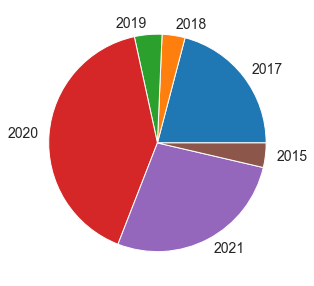

In [32]:
l=df_albums.groupby(df_albums['Date of Release'].dt.year)['Number of Tracks'].agg(['sum'])
Y=[]
s=[]
y=set(df_albums['Date of Release'].dt.year)
for yr in y:
    Y.append(yr)
    s.append(l['sum'][yr])
plt.pie(s,labels=Y)    

### Insights
1. The maximum number of tracks were released in 2020.
2. The minimum number of tracks were released in 2018.

## Explicit Song Statistics

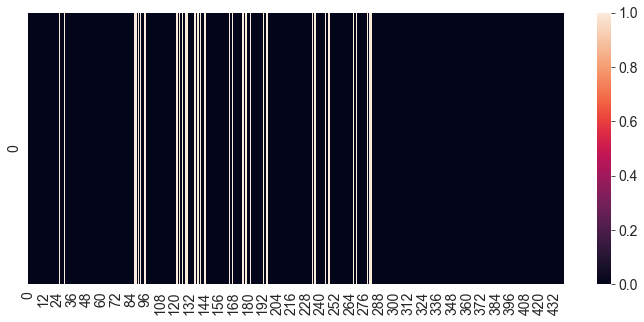

In [33]:
ax = sns.heatmap([dff['explicit']])
plt.show()

### Insights
1. All the songs with any kind of offensive words are represented by white in the above heatmap.
2. The values for explicitness will either be zero suggesting that there are no offensive words(represented by the colour black in the heatmap) or one suggesting that the song does have offensive content(represented by the colour white in the heatmap)

## Analysis of Danceability, Energy and Acousticness of Popular Songs

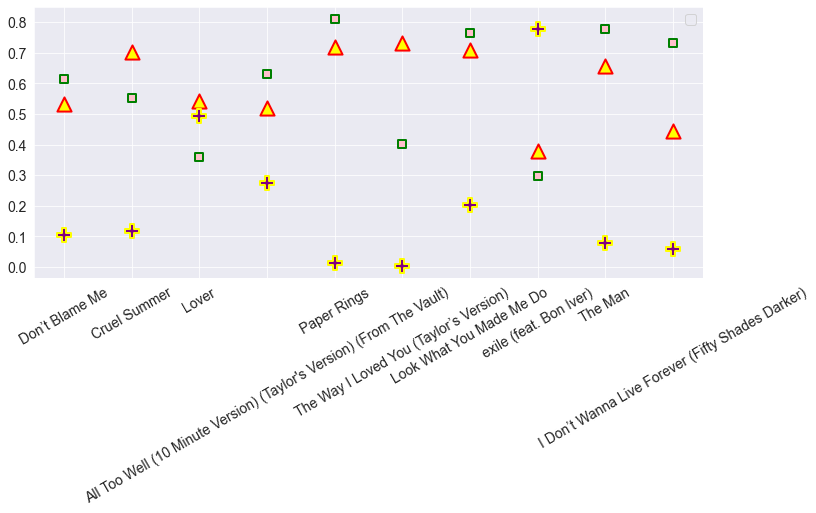

In [55]:
x=list(dff.sort_values(by='popularity',ascending=False).head(10)['name'])
y1=list(dff.sort_values(by='popularity',ascending=False).head(10)['danceability'])
y2=list(dff.sort_values(by='popularity',ascending=False).head(10)['energy'])
y3=list(dff.sort_values(by='popularity',ascending=False).head(10)['acousticness'])
plt.xticks(rotation=30)
plt.legend(["Danceability","Energy","Acousticness","Tempo"])
plt.scatter(x, y1, c ="pink",linewidths = 2,marker ="s",edgecolor ="green",s = 50)
plt.scatter(x, y2, c ="yellow",linewidths = 2,marker ="^",edgecolor ="red",s = 200)
plt.scatter(x, y3, c ="purple",linewidths = 2,marker ="P",edgecolor ="yellow",s = 200)

 
 

# Asking and Answering Questions

### Q1. List the five most popular songs of the artist.

In [56]:
dff.sort_values(by='popularity',ascending=False).head(5)['name']

335                                       Don’t Blame Me
300                                         Cruel Summer
301                                                Lover
29     All Too Well (10 Minute Version) (Taylor's Ver...
306                                          Paper Rings
Name: name, dtype: object

### Q2. Filter out all the songs of the artist with expletives.

In [57]:
dff.loc[dff['explicit']==True]['name']

25     I Bet You Think About Me (feat. Chris Stapleto...
29     All Too Well (10 Minute Version) (Taylor's Ver...
87                                    champagne problems
88                                             gold rush
90                                           tolerate it
92                                             happiness
95                                                   ivy
96                                        cowboy like me
121                                   champagne problems
122                                            gold rush
124                                          tolerate it
126                                            happiness
129                                                  ivy
130                                       cowboy like me
136                                   champagne problems
137                                            gold rush
139                                          tolerate it
141                            

### Q3. Which is the most energetic Taylor Swift song ?

In [60]:
dff.sort_values(by='energy',ascending=False).head(1)['name']

439    New Romantics - Karaoke Version
Name: name, dtype: object

### Q4. List the five most unpopular songs of the artist?

In [61]:
dff.sort_values(by='energy').head(5)['name']

331                     New Year's Day - Karaoke Version
19     State Of Grace (Acoustic Version) (Taylor's Ve...
49     State Of Grace (Acoustic Version) (Taylor's Ve...
346                                       New Year’s Day
376                                       New Year’s Day
Name: name, dtype: object

### Q5. List the album with the most and the least number of tracks.

In [66]:
print("Album with most number of tracks:")
print(df_albums.sort_values(by='Number of Tracks',ascending=False).head(1)['Album Name'])
print("Album with least number of tracks:")
print(df_albums.sort_values(by='Number of Tracks').head(1)['Album Name'])

Album with most number of tracks:
18    reputation Stadium Tour Surprise Song Playlist
Name: Album Name, dtype: object
Album with least number of tracks:
16    reputation
Name: Album Name, dtype: object


# References and Future Work
Although we used some data only for this project but one can download any artist's whole data by using his URI appropriately and then use it for complete analysis purpose. We can explore more functions from the spotipy library. 

References:-
1. GeeksForGeeks
2. Pandas Documentation
3. stackoverflow
4. Matplotlib Documentation
5. Spotify for Developers